# Titanic Kaggle Project
## Project Overview:
You are provided with a train and test dataset to build an ML model to predict survival among Titanic Passengers.
Columns in dataset:
- PassengerID
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
- Name
- Sex: male, female
- Age: Age in years
- Sib: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton
### Libraries & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#train_data = pd.read_csv("../input/titanic/train.csv")
# ignore for offline work
# code for offline work
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#test_data = pd.read_csv("../input/titanic/test.csv")
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Initial Data Exploration & Cleaning
We start by looking at the train dataset & see the average profile of survivors as well as data completeness.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
import missingno
# Missing data in train set
missingno.matrix(train_data)

ModuleNotFoundError: No module named 'missingno'

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [75]:
# Missing data in test set
missingno.matrix(test_data)

NameError: name 'missingno' is not defined

1. Age, Cabin and Embarked seem to have missing values, Cabin has almost 700 missing values, Age ~180 and a couple for Embarked (which we could exclude).
    - if we want to fill na values in these 3 columns we also need to do so in the test_dataset.
2. All other columns seem fine and don't need evaluation of data filling.

## Data Cleaning
### Age

In [7]:
train_data['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
0.42       1
34.50      1
66.00      1
14.50      1
0.92       1
Name: Age, Length: 89, dtype: int64

In [8]:
# Let's look at age distribution (Male vs Female)
train_data_female = train_data[train_data['Sex']=='female'].copy()
train_data_male = train_data[train_data['Sex']=='male'].copy()
train_data_female['Age'].value_counts(bins=10, dropna=False).sort_index()
train_data_male['Age'].value_counts(bins=10, dropna=False).sort_index()

(0.339, 8.378]       28
(8.378, 16.336]      23
(16.336, 24.294]    109
(24.294, 32.252]    117
(32.252, 40.21]      74
(40.21, 48.168]      46
(48.168, 56.126]     29
(56.126, 64.084]     16
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64

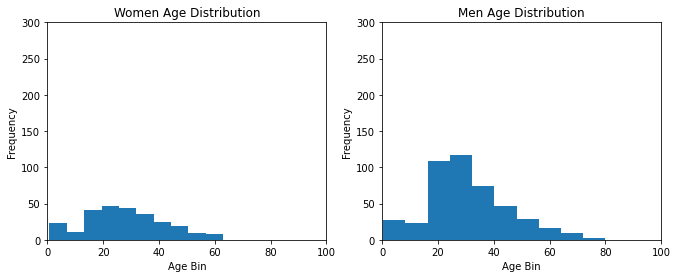

In [9]:
#Age distribution
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
train_data_female['Age'].plot.hist()
plt.title('Women Age Distribution')
plt.xlim(0,100)
plt.ylim([0,300])
plt.xlabel(('Age Bin'))

plt.subplot(1,2,2)
train_data_male['Age'].plot.hist()
plt.title('Men Age Distribution')
plt.xlim(0,100)
plt.ylim([0,300])
plt.xlabel(('Age Bin'))

plt.show()

In [10]:
# Distribution does not seem weird, we should be able to fill the gaps using averages instead of medians

In [11]:
#avg_ages_survival = \
train_data[['Sex','Pclass','Embarked','Age','Survived']].groupby(['Sex','Embarked','Pclass']).mean()
#avg_ages = train_data[['Sex','Pclass','Age']].groupby(['Sex','Pclass']).mean()

Age  Survived
Sex    Embarked Pclass                     
female C        1       36.052632  0.976744
                2       19.142857  1.000000
                3       14.062500  0.652174
       Q        1       33.000000  1.000000
                2       30.000000  1.000000
                3       22.850000  0.727273
       S        1       32.704545  0.958333
                2       29.719697  0.910448
                3       23.223684  0.375000
male   C        1       40.111111  0.404762
                2       25.937500  0.200000
                3       25.016800  0.232558
       Q        1       44.000000  0.000000
                2       57.000000  0.000000
                3       28.142857  0.076923
       S        1       41.897188  0.354430
                2       30.875889  0.154639
                3       26.574766  0.128302

In [12]:
train_data[['Sex','Pclass','Embarked','Age','Survived']].groupby(['Embarked','Sex']).mean()

Pclass        Age  Survived
Embarked Sex                                  
C        female  1.726027  28.344262  0.876712
         male    2.010526  32.998841  0.305263
Q        female  2.888889  24.291667  0.750000
         male    2.926829  30.937500  0.073171
S        female  2.197044  27.771505  0.689655
         male    2.421769  30.291440  0.174603

In [13]:
pvt_ages = pd.pivot_table(train_data, values='Age', index='Sex', columns='Pclass')
pd.pivot_table(train_data, values='Age', index='Sex', columns='Pclass')
#pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat',columns='gender')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


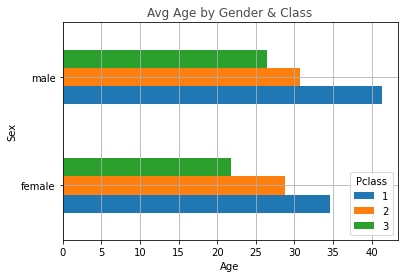

In [14]:
# Let's plot Age by Sex and Class
pvt_ages.plot(kind='barh',grid=True)
plt.title('Avg Age by Gender & Class',alpha=0.7)
plt.xlabel('Gender')
plt.xlabel('Age')
plt.show()

In [15]:
pvt_survival = pd.pivot_table(train_data, values='Survived', index='Sex', columns='Pclass')
pd.pivot_table(train_data, values='Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


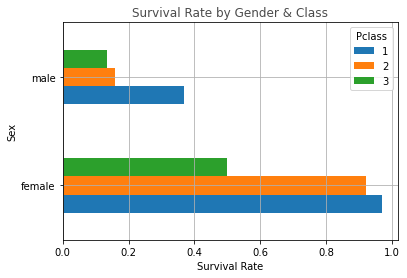

In [16]:
# Let's plot Age by Sex and Class
pvt_survival.plot(kind='barh',grid=True)
plt.title('Survival Rate by Gender & Class',alpha=0.7)
plt.xlabel('Gender')
plt.xlabel('Survival Rate')
plt.show()

Things we noticed:
- Female survival rate is much higher in first & second class vs any other group and even 3rd class women has a higher survival rate vs Men in 1st class.
- People embarked at Southampton seem to have a lower survival rate within the same gender and class categories.

In [17]:
# Fill NaN values with Avg age by gender and ticket class
train_data['Age_filled'] = train_data.groupby(['Sex','Pclass'])['Age'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [18]:
# check it went ok
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_filled   891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [19]:
# compare averages by group vs Age
pvt_ages_filled = pd.pivot_table(train_data, values='Age_filled', index='Sex', columns='Pclass')
pd.pivot_table(train_data, values='Age_filled', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [20]:
pvt_ages = pd.pivot_table(train_data, values='Age', index='Sex', columns='Pclass')
pd.pivot_table(train_data, values='Age', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [21]:
train_data['Age'] = train_data['Age_filled']
train_data = train_data.drop('Age_filled', axis=1)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Fill test_data as well
test_data['Age_filled'] = test_data.groupby(['Sex','Pclass'])['Age'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [24]:
test_data['Age']=test_data['Age_filled']
test_data = test_data.drop('Age_filled',axis=1)

### Embarked
Let's look into Embarked distributioin and how we can either fill or exclude those 2 missing values

In [25]:
train_data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

S is the most frequent value so we are going to fill the 2 gaps with it.

In [26]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [27]:
train_data['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
test_data['Embarked'].value_counts(dropna=False)
# No need to fill test_data

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### Cabin
Let's look into cabin data and see how we can fill the gaps

In [29]:
train_data['Cabin'].value_counts(dropna=False)
# ~80% is not available, we don't think there is a way to get

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
C7               1
C49              1
B78              1
E10              1
C118             1
Name: Cabin, Length: 148, dtype: int64

### Fare
Let's look into cabin data and see if there are gaps to fill


In [30]:
train_data['Fare'].value_counts(dropna=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [31]:
test_data['Fare'].value_counts(dropna=False)
# there is one value to fill in
test_data['Fare'].mean()

35.627188489208635

In [32]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [33]:
test_data['Fare'].value_counts(dropna=False)

7.7500      21
26.0000     19
13.0000     17
8.0500      17
10.5000     11
            ..
30.0000      1
53.1000      1
146.5208     1
10.7083      1
20.2500      1
Name: Fare, Length: 170, dtype: int64

### Name
Let's see if we can extract something from names

In [34]:
train_data['Name'].value_counts()

Heininen, Miss. Wendla Maria                       1
McKane, Mr. Peter David                            1
Scanlan, Mr. James                                 1
McCormack, Mr. Thomas Joseph                       1
Olsson, Miss. Elina                                1
                                                  ..
Nenkoff, Mr. Christo                               1
Gustafsson, Mr. Karl Gideon                        1
Andersen-Jensen, Miss. Carla Christine Nielsine    1
Saad, Mr. Khalil                                   1
Baxter, Mr. Quigg Edmond                           1
Name: Name, Length: 891, dtype: int64

In [35]:
# Let's try to extract the title from the name:
#name = 'van Billiard, Mr. Austin Blyler'
#title = (name.split(', ')[1]).split('. ')[0]
#print(title)
def extract_title(s):
    title = (s.split(',')[1]).split('. ')[0].strip()
    return title
train_data['title'] = train_data['Name'].apply(extract_title)
train_data['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Jonkheer          1
the Countess      1
Lady              1
Mme               1
Ms                1
Sir               1
Capt              1
Name: title, dtype: int64

In [36]:
test_data['title'] = test_data['Name'].apply(extract_title)
test_data['title'].value_counts()
# We need to take into account Dona as well (female of Don)

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64

In [37]:
# prepare dictionary
title_dictionary = {"Mr":"Mr",
                    "Miss":"Miss",
                    "Mrs":"Mrs",
                    "Master":"Master",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Mlle":"Miss",
                    "Mme":"Mrs",
                    "Capt":"Officer",
                    "Sir":"Noble",
                    "Jonkheer":"Noble",
                    "Lady":"Noble",
                    "Ms":"Mrs",
                    "Don":"Noble",
                    "the Countess":"Noble",
                    "Dona":"Noble"}
# update titles definition
train_data['title'] = train_data['title'].map(title_dictionary)

In [38]:
train_data['title'].value_counts(dropna=False)

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Noble        5
Name: title, dtype: int64

In [39]:
test_data['title'] = test_data['title'].map(title_dictionary)

In [40]:
test_data['title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Noble        1
Name: title, dtype: int64

### Survival Rates

In [41]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [42]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## Data Mapping
Non-numeric columns need to be converted to numbers in order to be used in models.

In [43]:
train_data.head()
# we need to map Sex, SibSp, Parch, Embarked & Title to numbers in order to use them in our model better

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [44]:
sex_map = { 'female':0 , 'male':1 }
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Officer':5, 'Noble':6}
embark_map = {'S':0, 'C':1, 'Q':2}

# let's focus on non-numeric categories for now, thus skipping Fare, Cabin, Family Size, Age in mapping bands etc for now
train_data['Sex'] = train_data['Sex'].map(sex_map)
test_data['Sex'] = test_data['Sex'].map(sex_map)

train_data['title'] = train_data['title'].map(title_map)
test_data['title'] = test_data['title'].map(title_map)

train_data['Embarked'] = train_data['Embarked'].map(embark_map)
test_data['Embarked'] = test_data['Embarked'].map(embark_map)

In [45]:
# Drop columns not needed
train_data = train_data.drop(['Name','Ticket','Cabin'],axis=1)
test_data = test_data.drop(['Name','Ticket','Cabin'],axis=1)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,3
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,0,3
4,5,0,3,1,35.0,0,0,8.0500,0,1


In [60]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,892,3,1,34.5,0,0,7.8292,2,1
1,893,3,0,47.0,1,0,7.0000,0,3
2,894,2,1,62.0,0,0,9.6875,2,1
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,3


## Model & Submission

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Pclass","Age","Sex", "SibSp", "Parch","Fare","Embarked","title"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_random_forest_4.csv', index=False)
print("Your Random Forest submission was successfully saved!")

Your submission was successfully saved!


- Reducing the Levels of depth from 5 (and 4 as well) to 3 returned an improvement in Accuracy to 0.79186 vs 0.7799.
- Going to 2 levels of depth brings the score down to 0.78229

## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

X_train_dt = train_data.drop('Survived', axis=1)
Y_train_dt = train_data['Survived']
# X_test_dt  = test_data.drop('PassengerId', axis=1).copy()
X_test_dt  = test_data

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_dt, Y_train_dt)
Y_pred_dt = decision_tree.predict(X_test_dt)
accuracy = round(decision_tree.score(X_train_dt, Y_train_dt) * 100, 2)
print("Model Accuracy: ",accuracy)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred_dt})
output.to_csv('my_submission_decision_tree_1.csv', index=False)
print("Your Decision Tree submission was successfully saved!")

Model Accuracy:  100.0
Your Decision Tree submission was successfully saved!


The score from a Decision Tree is only 0.67703

In [48]:
###